In [1]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_samples = 1000
radius = 0.25
light = 5.0
const = 0.001
s_x = np.linspace(0., 10., 100)
sigma = np.linspace(0.001,np.sqrt((2.5**2)/2), 100)
save_dir = os.path.join(os.getcwd(), './result/image')
save = True

In [3]:
def sigma(s_x):
    var = 0.5 * np.power(5.0 - s_x, 2) + const
    return np.sqrt(var)

In [4]:
def prob_particle_in_area(radius, s_x):
    sig = sigma(s_x)
    prob = 1 - np.exp(-(np.power(radius,2)/(2*np.power(sig,2))))
    return prob

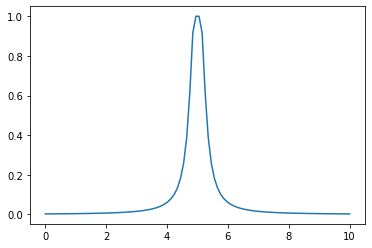

In [5]:
prob = prob_particle_in_area(radius, s_x)

plt.plot(s_x, prob)
if save:
    plt.savefig(os.path.join(save_dir, 'prob_particle_in_area'))
plt.show()

In [6]:
prob_particle_in_area(0.1, 4.90)

0.5654017914929239

In [7]:
def prob_goal(num_samples, prob, condi = 0.7):
    mean = num_samples * prob
    std = np.sqrt(num_samples * prob * (1 - prob))
    dist = scipy.stats.norm(mean, std)

    prob = 1 - dist.cdf(num_samples * condi)

    return prob

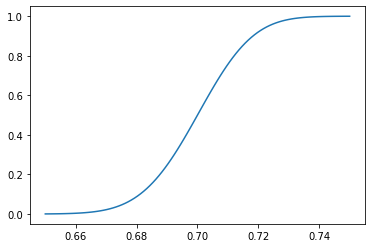

In [8]:
p = np.linspace(0.65, 0.75, 100)
goal = prob_goal(num_samples, p)

# print(goal)

plt.plot(p, goal)
if save:
    plt.savefig(os.path.join(save_dir, 'prob_goal'))
plt.show()